### Interpolation
Method of constructing new data points within the range of discrete set of known data points.

Types of interpolation algorithms in OpenCV:
* INTER_NEAREST 
* INTER_LINEAR 
* INTER_AREA 
* INTER_CUBIC , and
* INTER_LANCZOS4



In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-06-05 05:16:35--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.190
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.8MB/s    in 1.6s    

2022-06-05 05:16:37 (17.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



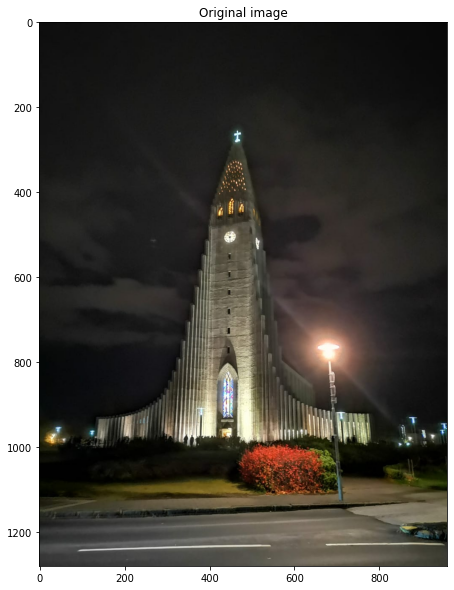

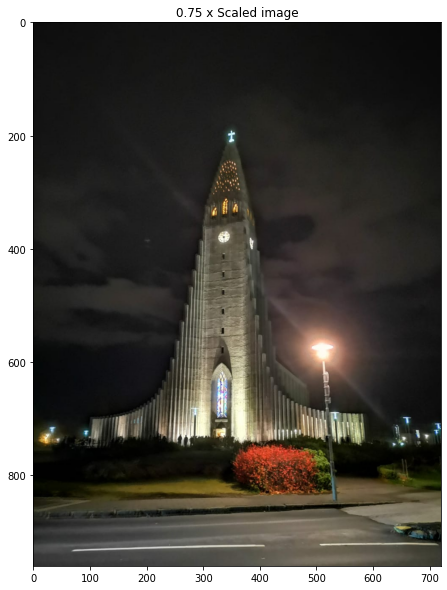

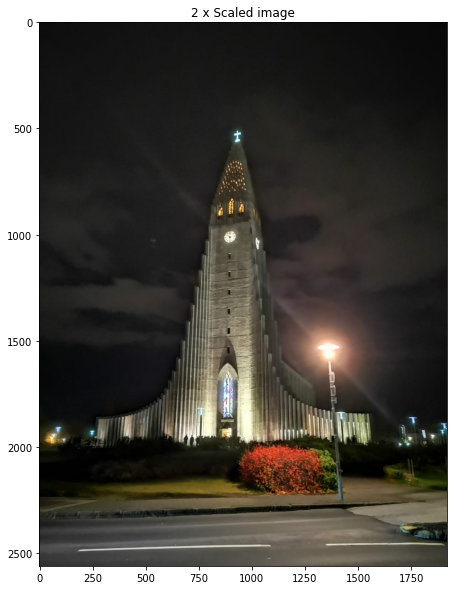

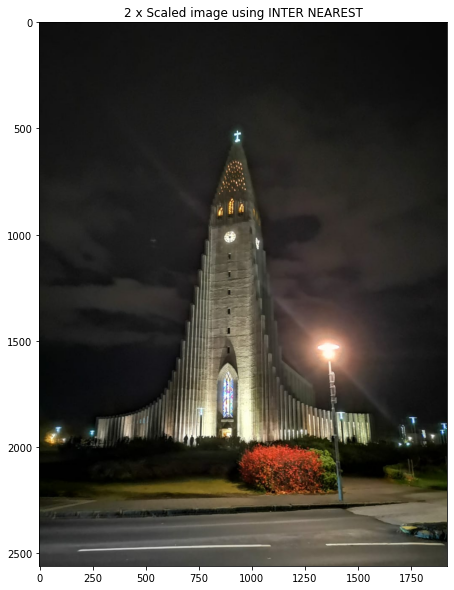

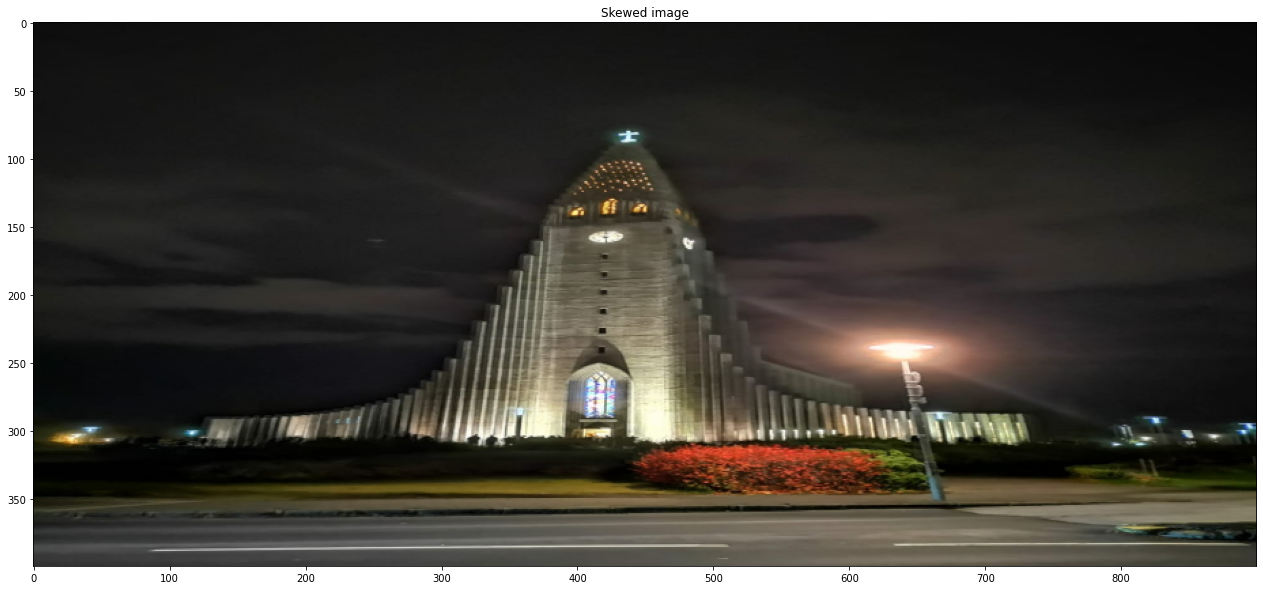

In [3]:
image = cv2.imread("/content/images/church_iceland.jpeg")
imshow("Original image", image)

# if no interpolation is specified. cv2.INTER_LINEAR is used as default
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75 x Scaled image", image_scaled)

# double the size
image_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
imshow("2 x Scaled image", image_scaled2)

# double the size using INTER NEAREST interpolation
image_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
imshow("2 x Scaled image using INTER NEAREST", image_scaled3)

# skew the re-sizing by setting exact dimension
image_scaled4 = cv2.resize(image, (900,400), interpolation=cv2.INTER_AREA)
imshow("Skewed image", image_scaled4)

### Image Pyramids

To upscale (2 Times) or downsclae (2 Times) the image. It is a quicker way

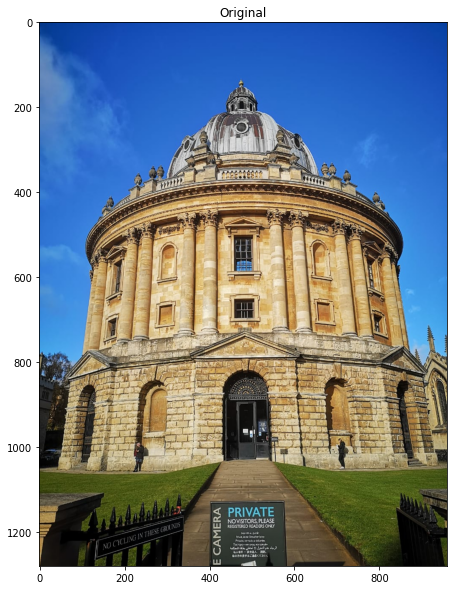

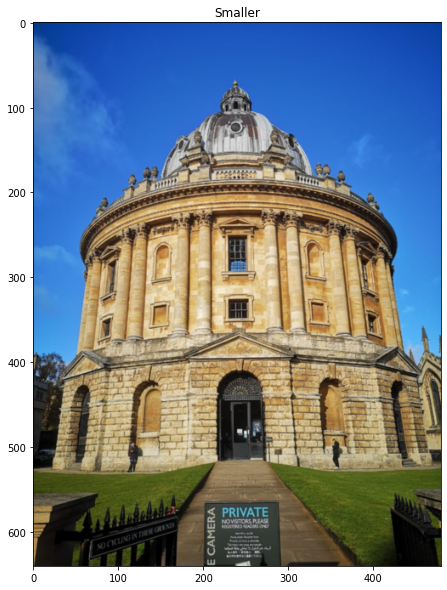

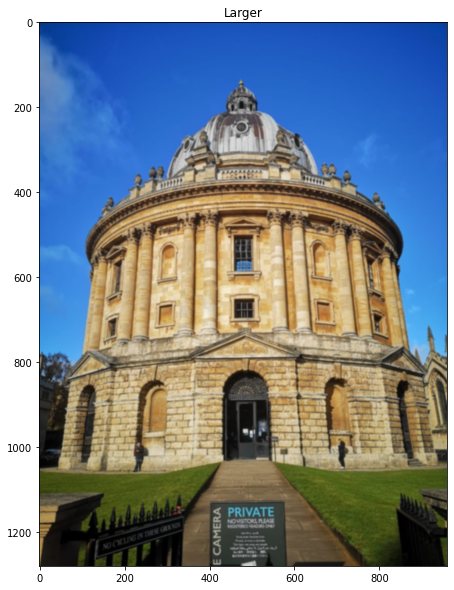

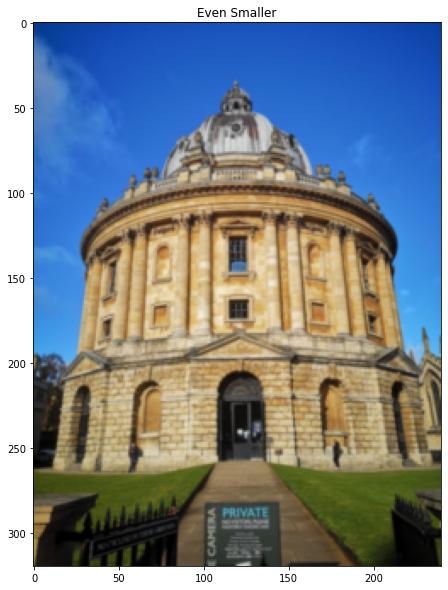

In [6]:
image = cv2.imread("/content/images/oxfordlibrary.jpeg")

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)
even_smaller = cv2.pyrDown(smaller)

imshow("Original", image)
imshow("Smaller", smaller)
imshow("Larger", larger)
imshow("Even Smaller", even_smaller)

##### Cropping

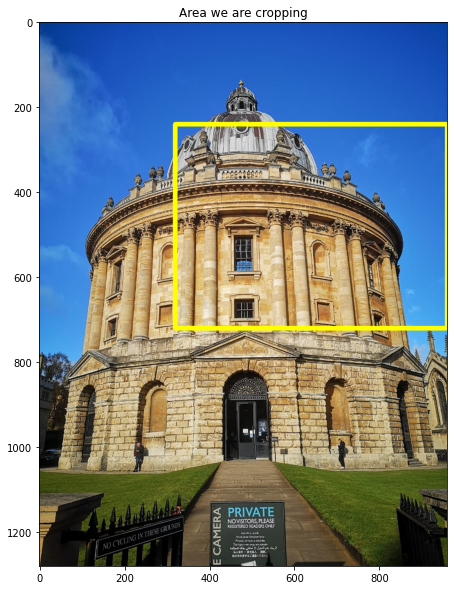

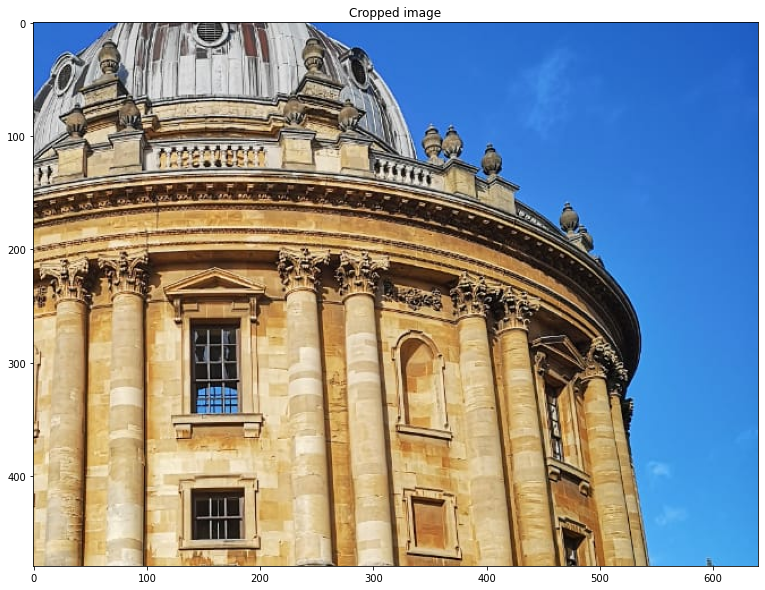

In [7]:
image = cv2.imread("/content/images/oxfordlibrary.jpeg")

# Get image dimensions
width, height = image.shape[:2]

# Get starting pixel coordinates (top left of cropping rectangle)
# using 0.25 to get the x,y positions that is 1/4 down from the top left (0,0)
starting_row, starting_col = int(height * 0.25), int(width * 0.25)

# let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * 0.75), int(width * 0.75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[starting_row:end_row, starting_col:end_col]

copy = image.copy()
cv2.rectangle(copy, (starting_col, starting_row), (end_col, end_row), (0, 255, 255), 10)

imshow("Area we are cropping", copy)
imshow("Cropped image", cropped)